In [10]:
import requests
from bs4 import BeautifulSoup
import re
import json
from selenium import webdriver
from lxml import etree
import os
from os import path
import shutil
import time
import demjson
from selenium.webdriver.chrome.options import Options
from selenium.webdriver import ChromeOptions
from multiprocessing.dummy import Pool

In [13]:
def getResponse(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.182 Safari/537.36'
    }
    response = requests.get(url=url, headers=headers)
    return response

# 通过selenium获取page_text
def getHTMLBySelenium(url):
    chrome_options =Options()
    chrome_options.add_argument('--headless')
    # 如何实现让selenium规避被检测到的风险
    option = ChromeOptions()
    option.add_experimental_option('excludeSwitches', ['enable-automation'])
    browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)
    browser.get(url)
    time.sleep(2)
    page_text = browser.page_source
    browser.quit()
    return page_text

<!-- 注意：这个文件是一个公共文件，被很多地方引用，改动需要注意其他类型页面是否有受影响 -->
<!DOCTYPE html>
<html class="

">
    <head>
                        <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="color-scheme" content="light dark">
<meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=1.0,user-scalable=0,viewport-fit=cover">
<link rel="shortcut icon" type="image/x-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/NTI4MWU5.ico">
<link rel="mask-icon" href="//res.wx.qq.com/a/wx_fed/assets/res/MjliNWVm.svg" color="#4C4C4C">
<link rel="apple-touch-icon-precomposed" href="//res.wx.qq.com/a/wx_fed/assets/res/OTE0YTAw.png">
<meta name="apple-mobile-web-app-capable" content="yes">
<meta name="apple-mobile-web-app-status-bar-style" content="black">
<meta name="format-detection" content="telephone=no">


        

  
  <meta name="description" content="" />
  <meta name="author" content="" />

  
  <meta property
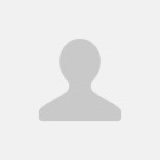
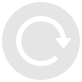
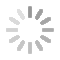
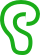
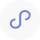
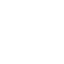
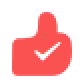
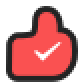
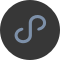

In [15]:
# https://mp.weixin.qq.com/s/P4ar7toT8H_2W9wWUU-Oiw
url = 'https://mp.weixin.qq.com/s/P4ar7toT8H_2W9wWUU-Oiw'
#page_text = getHTMLBySelenium(url)
page_text = getResponse(url).text
print(page_text)

In [ ]:
# //*[@id="js_content"]/section[1]/section[1]/p[2]/iframe

In [43]:
url = 'https://mp.weixin.qq.com/s/q0IFSxAc3hMm9lp4-YnEmA'
chrome_options =Options()
chrome_options.add_argument('--headless')
# 如何实现让selenium规避被检测到的风险
option = ChromeOptions()
option.add_experimental_option('excludeSwitches', ['enable-automation'])
browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)
#browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe')
browser.maximize_window()
browser.get(url)

<ipython-input-43-8cee6de58552>:7: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)


In [44]:
iframe = browser.find_element_by_tag_name("iframe")
browser.switch_to.frame(iframe)

In [45]:
video = browser.find_element_by_tag_name("video")

In [46]:
src = video.get_attribute('origin_src')

In [47]:
print(src)

http://mpvideo.qpic.cn/0b78gqaauaaajqae7tp4crpvangdbi2aacqa.f10002.mp4?dis_k=a2018a171791f0260f6f5a6ba1b50da2&dis_t=1618900304&spec_id=MzUyMzA0NzkzNA%3D%3D1618900304&vid=wxv_1690742489160220674&format_id=10002


In [35]:
browser.quit()

In [61]:
def getMp4Url(url):
    try:
        # 需要使用selenium 并且切换iframe 加上 属性定位
        chrome_options =Options()
        chrome_options.add_argument('--headless')
        # 如何实现让selenium规避被检测到的风险
        option = ChromeOptions()
        option.add_experimental_option('excludeSwitches', ['enable-automation'])
        browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)
        #browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe')
        browser.maximize_window()
        browser.get(url)
        #time.sleep(1)
        iframe = browser.find_element_by_tag_name("iframe")
        browser.switch_to.frame(iframe)
        time.sleep(1)
        video = browser.find_element_by_tag_name("video")
        src = video.get_attribute('origin_src')
        browser.quit()
        return src
    except Exception as e:
        return ''

In [53]:
print(getMp4Url('https://mp.weixin.qq.com/s/q0IFSxAc3hMm9lp4-YnEmA'))

<ipython-input-52-8942ed650e18>:8: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)


http://mpvideo.qpic.cn/0b78gqaauaaajqae7tp4crpvangdbi2aacqa.f10002.mp4?dis_k=5efa28185fbc6acb000f584c8c46d0b6&dis_t=1618900391&spec_id=MzUyMzA0NzkzNA%3D%3D1618900391&vid=wxv_1690742489160220674&format_id=10002


In [ ]:
# /html/body/div[1]/div[2]/div[1]/div/div[1]/div[3]/section[1]/section[1]/section/section[2]/section

In [59]:
url = 'https://mp.weixin.qq.com/s/B5HsA4F-YyHm1kdaUkLGpQ'
page_text = getResponse(url).text
tree = etree.HTML(page_text)
# //*[@id="js_content"]/section/section[1]/section[2]/section/section/section
allText = tree.xpath('//*[@id="js_content"]/section[1]/section[1]//p//text()')
text = '\n'.join(allText)
print(text)

记者：孙厅长您好！请介绍一下贵州省全面推行行政执法“三项制度”改革的组织实施情况？
孙学雷：
贵州省委、省政府高度重视全面推行行政执法“三项制度”改革工作，将其作为促进严格规范公正文明执法，助推法治政府建设的重要抓手，精心组织实施。2019年，贵州省将全面推行行政执法“三项制度”改革纳入了政府工作报告、省委全面深化改革工作要点、省委全面依法治省委员会工作要点、法治政府建设工作要点。省委副书记、省长谌贻琴多次在会议上强调，要把依法行政贯穿政府工作始终，加快健全完善政府治理体系，大力推进平安贵州、法治贵州建设。谌贻琴省长关于法治政府建设的指示，为我省全面推行行政执法“三项制度”进一步指明了方向。省委常委、省委政法委书记、省委依法治省办主任时光辉专门开会安排部署。省政府明确郭瑞民副省长领衔推进此重大改革项目，在省级层面建立郭瑞民副省长主抓，省司法厅具体牵头，省级有关部门参加的省全面推行行政执法“三项制度”工作协调机制。郭瑞民副省长主持召开省委全面依法治省委员会执法协调小组会议、法治政府建设专题组会议研究贵州省实施意见，并高度关注行政执法“三项制度”推进情况，专门召开全省工作推进会，学习贯彻党的十九届四中全会精神，传达学习落实全国“三项制度”推进会精神，总结贵州省全面推行“三项制度”取得的成绩，分析存在的问题，明确下一步工作要求。
2019年3月底，根据国家指导意见的要求和司法部的安排部署，贵州省人民政府办公厅出台了《关于全面推行行政执法公示制度执法全过程记录制度重大执法决定法制审核制度的实施意见》。贵州省司法厅认真履行牵头单位工作职责，抓住“动员部署、培训宣传、调研督导、实施考核”四个环节，立足创新，精准用力，组织召开贵州省全面推行行政执法“三项制度”工作动员培训电视电话会和工作推进会;以政策解读、业务实操为培训重点，构建省、市、县齐抓的大培训格局，利用各类媒体宣传报道工作推进情况；多次开展督导调研，把“三项制度”推行情况连续两年纳入法治政府建设考核指标，努力将行政执法“三项制度”改革向纵深推进。
记者：刚才您提到,按照国家要求，贵州省人民政府办公厅出台了《关于全面推行行政执法公示制度执法全过程记录制度重大执法决定法制审核制度的实施意见》，该实施意见对照国家指导意见提出了什么新要求？
孙学雷：
《国务院办公厅关于全面推行行政执法公示制度执法全过程记录制度重大执法决定法制审

In [60]:
def getText(url):
    page_text = getResponse(url).text
    tree = etree.HTML(page_text)
    # //*[@id="js_content"]/section/section[1]/section[2]/section/section/section
    allText = tree.xpath('//*[@id="js_content"]/section[1]/section[1]//p//text()')
    text = '\n'.join(allText)
    return text

In [65]:
def downloadVideoAndTextForWeixin(url, fileName):
    mp4Url = getMp4Url(url)
    if mp4Url == '':
        return
    text = getText(url)
    with open('text/' + fileName + '.txt', 'w', encoding='utf-8') as fp:
        fp.write(text)
    print(fileName, ' text successful')
    content = getResponse(mp4Url).content
    with open('mp4/' + fileName + '.mp4', 'wb') as fp:
        fp.write(content)
    print(fileName, ' mp4 successful')

In [62]:
# http://www.moj.gov.cn/json/zxft_1.json
url = 'http://www.moj.gov.cn/json/zxft_1.json'
strJson = getResponse(url).text
jsonList = json.loads(strJson)
for obj in jsonList:
    pageUrl = obj['infostaticurl']
    print(pageUrl)

https://mp.weixin.qq.com/s/P4ar7toT8H_2W9wWUU-Oiw
https://mp.weixin.qq.com/s/riYNJGFxxNsryY3jH1a89A
https://mp.weixin.qq.com/s/hfOHpGD9Mdn0ICjYQAsndQ
https://mp.weixin.qq.com/s/q0IFSxAc3hMm9lp4-YnEmA
https://mp.weixin.qq.com/s/8-9c9nXnWsVr7pR94EWuKw
https://mp.weixin.qq.com/s/fStiQQRsdWE7tAsLoPr59Q
https://mp.weixin.qq.com/s/6QAjTQuvc2B9nBXL0cLR9w
https://mp.weixin.qq.com/s/N7aPQyBd6r1YEIslUoUecw
https://tv.cctv.com/2020/12/07/VIDE8WNnu6KZjxT9BoeIpC5e201207.shtml?spm=C45404.PhRThW8bw020.EToagw7mjlwm.3
https://mp.weixin.qq.com/s/W-T3BFP3pFsOW30FLMSMRQ
https://tv.cctv.com/2020/11/14/VIDE4DCeD5opymGozFsfeBK7201114.shtml
https://tv.cctv.com/2020/11/13/VIDEZM6EsZHf8KgSylfWEKYo201113.shtml
https://tv.cctv.com/2020/11/04/VIDEL0TIhho0ddzDIKlw1p2I201104.shtml?spm=C53156045404.PKXC0xLPAnP9.0.0
/news/content/2020-10/20/zxft_3258372.html
https://mp.weixin.qq.com/s/UYPKFyDJIXbGBQNpUmrdUA
https://mp.weixin.qq.com/s/XZqCChImjd8N7Rw-GTUA8w
https://mp.weixin.qq.com/s/B5HsA4F-YyHm1kdaUkLGpQ
https://mp.w

In [63]:
pageList = []
for obj in jsonList:
    pageUrl = obj['infostaticurl']
    print(pageUrl)
    pageList.append(pageUrl)

https://mp.weixin.qq.com/s/P4ar7toT8H_2W9wWUU-Oiw
https://mp.weixin.qq.com/s/riYNJGFxxNsryY3jH1a89A
https://mp.weixin.qq.com/s/hfOHpGD9Mdn0ICjYQAsndQ
https://mp.weixin.qq.com/s/q0IFSxAc3hMm9lp4-YnEmA
https://mp.weixin.qq.com/s/8-9c9nXnWsVr7pR94EWuKw
https://mp.weixin.qq.com/s/fStiQQRsdWE7tAsLoPr59Q
https://mp.weixin.qq.com/s/6QAjTQuvc2B9nBXL0cLR9w
https://mp.weixin.qq.com/s/N7aPQyBd6r1YEIslUoUecw
https://tv.cctv.com/2020/12/07/VIDE8WNnu6KZjxT9BoeIpC5e201207.shtml?spm=C45404.PhRThW8bw020.EToagw7mjlwm.3
https://mp.weixin.qq.com/s/W-T3BFP3pFsOW30FLMSMRQ
https://tv.cctv.com/2020/11/14/VIDE4DCeD5opymGozFsfeBK7201114.shtml
https://tv.cctv.com/2020/11/13/VIDEZM6EsZHf8KgSylfWEKYo201113.shtml
https://tv.cctv.com/2020/11/04/VIDEL0TIhho0ddzDIKlw1p2I201104.shtml?spm=C53156045404.PKXC0xLPAnP9.0.0
/news/content/2020-10/20/zxft_3258372.html
https://mp.weixin.qq.com/s/UYPKFyDJIXbGBQNpUmrdUA
https://mp.weixin.qq.com/s/XZqCChImjd8N7Rw-GTUA8w
https://mp.weixin.qq.com/s/B5HsA4F-YyHm1kdaUkLGpQ
https://mp.w

In [66]:
total = 0
for link in pageList:
    if not link.startswith('https://mp.weixin.qq.com'):
        continue
    print(link)
    downloadVideoAndTextForWeixin(link, str(total))
    total = total + 1

https://mp.weixin.qq.com/s/P4ar7toT8H_2W9wWUU-Oiw


<ipython-input-61-c662421d938a>:9: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path='C:/Users/Administrator/Desktop/chromedriver_win32/chromedriver.exe', chrome_options=chrome_options, options=option)


0  text successful
0  mp4 successful
https://mp.weixin.qq.com/s/riYNJGFxxNsryY3jH1a89A
1  text successful
1  mp4 successful
https://mp.weixin.qq.com/s/hfOHpGD9Mdn0ICjYQAsndQ
2  text successful
2  mp4 successful
https://mp.weixin.qq.com/s/q0IFSxAc3hMm9lp4-YnEmA
3  text successful
3  mp4 successful
https://mp.weixin.qq.com/s/8-9c9nXnWsVr7pR94EWuKw
4  text successful
4  mp4 successful
https://mp.weixin.qq.com/s/fStiQQRsdWE7tAsLoPr59Q
5  text successful
5  mp4 successful
https://mp.weixin.qq.com/s/6QAjTQuvc2B9nBXL0cLR9w
6  text successful
6  mp4 successful
https://mp.weixin.qq.com/s/N7aPQyBd6r1YEIslUoUecw
7  text successful
7  mp4 successful
https://mp.weixin.qq.com/s/W-T3BFP3pFsOW30FLMSMRQ
8  text successful
8  mp4 successful
https://mp.weixin.qq.com/s/UYPKFyDJIXbGBQNpUmrdUA
9  text successful
9  mp4 successful
https://mp.weixin.qq.com/s/XZqCChImjd8N7Rw-GTUA8w
10  text successful
10  mp4 successful
https://mp.weixin.qq.com/s/B5HsA4F-YyHm1kdaUkLGpQ
11  text successful
11  mp4 successful
ht

In [67]:
# http://www.moj.gov.cn/news/content/2017-12/15/zxft_10860.html
url = 'http://www.moj.gov.cn/news/content/2017-12/15/zxft_10860.html'
page_text = getResponse(url).text
print(page_text)

<!doctype html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head> 
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8"> 
  <meta http-equiv="X-UA-Compatible" content="IE=edge"> 
  <title>新时代司法行政基层工作如何更“接地气”？三大关键词解民忧！</title> 
  <link rel="icon" href="http://www.legaldaily.com.cn/tongyong/images/2019sfb/2019favicon.ico" type="image/x-icon"> 
  <link href="/news/tplimg/35/css/style.css" rel="stylesheet" type="text/css"> 
  <link href="/news/tplimg/35/css/basic.css" rel="stylesheet" type="text/css"> 
  <script type="text/javascript" src="/news/tplimg/35/js/jquery1.42.min.js"></script> 
  <script type="text/javascript" src="/news/tplimg/35/js/jquery.SuperSlide.2.1.js"></script> 
  <style>
        .top1400 {
            width: 1400px;
            margin: 0 auto;
            position: relative;
        }

        .lang {
            position: absolute;
            top: 108px;
            left: 608px;
        }

        .lang > a {
            float: left;
        }
      


In [68]:
# http://www.moj.gov.cn/news/video/file/video/20171215/1513329938942060599.mp4
tree = etree.HTML(page_text)
mp4Src = 'http://www.moj.gov.cn' + tree.xpath('//video/@src')[0]
print(mp4Src)

/news/video/file/video/20171215/1513329938942060599.mp4


In [69]:
def getNewsMp4Src(url):
    page_text = getResponse(url).text
    tree = etree.HTML(page_text)
    temp = tree.xpath('//video/@src')
    if len(temp) == 0:
        return ''
    mp4Src = 'http://www.moj.gov.cn' + temp[0]
    return mp4Src

In [70]:
print(getNewsMp4Src('http://www.moj.gov.cn/news/content/2017-12/06/zxft_10431.html'))

http://www.moj.gov.cn/news/video/file/video/20171206/1512556692736051542.mp4


In [71]:
def getNewsText(url):
    page_text = getResponse(url).text
    tree = etree.HTML(page_text)
    allText = tree.xpath('//div[@id="content"]/span//text()')
    text = '\n'.join(allText)
    return text

In [72]:
print(getNewsText('http://www.moj.gov.cn/news/content/2017-12/11/zxft_10612.html'))

.
　　如何进行人身伤残等级认定?做司法鉴定!
　　如何辨别欠条上签名的真伪?做司法鉴定!
　　如何确定亲子关系?还是做司法鉴定!
　　我们看到，随着社会经济的飞速发展，司法活动日益专业化、复杂化、综合化。因此，司法鉴定也越来越多地被运用到我们的生活之中。
　　那么，司法鉴定的主要作用是什么?如何才能保证鉴定意见客观公正?当前司法鉴定行业的主要问题和解决之道是什么?未来的行业改革发展方向又如何呢?在本期“学习贯彻十九大精神·司法部司局长访谈”中，司法部司法鉴定管理局局长邓甲明将为大家一一揭晓答案!
　　涨姿势!
　　司法鉴定到底是咋回事儿
　　“司法鉴定”=“司法”+“鉴定”?
　　NO!NO!NO!
　　小常识：司法鉴定是指在诉讼活动中鉴定人运用科学技术或者专门知识对诉讼中涉及的专门性问题进行鉴别和判断并提供鉴定意见的活动。
　　四个层次解读司法鉴定
　　一表读懂我国司法鉴定管理体制发展
　　由此可见，我国司法鉴定管理体制的发展经历了从司法机关分散管理到司法行政机关统一管理的过程！
　　看要点!
　　坚决保证司法鉴定意见客观公正
　　客观公正，是老百姓对司法鉴定的根本要求。那么，如何才能确保鉴定人的独立性和鉴定机构的中立性，防止权势、人情和金钱的干扰呢?
　　不要担心!《决定》规定了鉴定人负责制度和鉴定人独立进行鉴定两项原则。在此基础上，中办、国办印发的《实施意见》提出明确要求：
　　然而，有媒体曾报道过“相同的鉴定事项会得出不同的鉴定意见”的现象，对此，邓甲明局长直面问题、回应关切，带来权威解读：
　
　　为了解决问题，司法部司法鉴定管理局打出监管组合拳：
　　严格司法鉴定行业的准入要求;
　　统一鉴定标准，不断提高司法鉴定科学化、规范化水平;
　　及时处理、严肃处罚违法违规鉴定行为。
　　从而避免或减少鉴定意见不合理的差异化现象，使司法鉴定的专业性、科学性和鉴定质量符合诉讼活动的要求。
　　严管理!
　　对违法违规行为“零容忍”
　　鉴定意见作为法定的证据种类之一，往往会对犯罪嫌疑人是否有罪、罪行轻重或者民事案件当事人是否承担赔偿责任、赔偿责任大小等产生重要影响。然而，在司法鉴定行业发展过程中，对于出现的一些不遵守职业道德和执业规则的“害群之马”，我们将如何处理呢?
　　邓甲明局长的答案只有一个：
　　以“零容忍”的态度发现一起、查处一起，绝不姑息、绝不手软!

In [73]:
def downloadVideoAndTextForNews(url, fileName):
    mp4Url = getNewsMp4Src(url)
    if mp4Url == '':
        return
    text = getNewsText(url)
    with open('text/' + fileName + '.txt', 'w', encoding='utf-8') as fp:
        fp.write(text)
    print(fileName, ' text successful')
    content = getResponse(mp4Url).content
    with open('mp4/' + fileName + '.mp4', 'wb') as fp:
        fp.write(content)
    print(fileName, ' mp4 successful')

In [74]:
total = 22
for link in pageList:
    if not link.startswith('/news/'):
        continue
    link = 'http://www.moj.gov.cn' + link
    print(link)
    downloadVideoAndTextForNews(link, str(total))
    total = total + 1

http://www.moj.gov.cn/news/content/2020-10/20/zxft_3258372.html
http://www.moj.gov.cn/news/content/2020-01/20/zxft_3244401.html
http://www.moj.gov.cn/news/content/2019-08/31/zxft_3231101.html
http://www.moj.gov.cn/news/content/2019-07/17/zxft_3228296.html
http://www.moj.gov.cn/news/content/2019-07/15/zxft_3228192.html
http://www.moj.gov.cn/news/content/2019-07/12/zxft_3228086.html
http://www.moj.gov.cn/news/content/2019-07/10/zxft_3227911.html
http://www.moj.gov.cn/news/content/2019-07/09/zxft_3227868.html
http://www.moj.gov.cn/news/content/2019-07/08/zxft_3227839.html
http://www.moj.gov.cn/news/content/2019-07/04/zxft_3227580.html
http://www.moj.gov.cn/news/content/2019-03/12/zxft_230173.html
http://www.moj.gov.cn/news/content/2019-03/12/zxft_230172.html
http://www.moj.gov.cn/news/content/2019-03/12/zxft_230171.html
http://www.moj.gov.cn/news/content/2018-11/11/zxft_230028.html
http://www.moj.gov.cn/news/content/2018-09/27/zxft_230027.html
http://www.moj.gov.cn/news/content/2018-03/16

MemoryError: 